<a href="https://colab.research.google.com/github/SablArt/LR1st/blob/main/%D0%BB%D0%B0%D0%B1%D0%B03_%D0%B4%D0%BE%D0%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Все данные из строки 2008
        Год  Общее производство (млрд. кВт·ч)  Производство ТЭЦ (млрд. кВт·ч)  \
2008  2008                            1040.4                           710.0   

      Производство ГЭС (млрд. кВт·ч)  Производство АЭС (млрд. кВт·ч)  \
2008                           167.0                           163.0   

      Доля ТЭЦ (%)  Доля ГЭС (%)  Доля АЭС (%)  
2008         68.24         16.05         15.67   


Все данные при условии общей выработки >1000
                Год  Общее производство (млрд. кВт·ч)  \
1991          1991                            1068.2   
1992          1992                            1008.5   
2007          2007                            1015.3   
2008          2008                            1040.4   
2010 (4)  2010 (4)                            1038.0   
2011 (4)  2011 (4)                            1055.0   
2012 (4)  2012 (4)                            1069.0   
2013 (4)  2013 (4)                            1059.0   
2014 (4)  2014 (

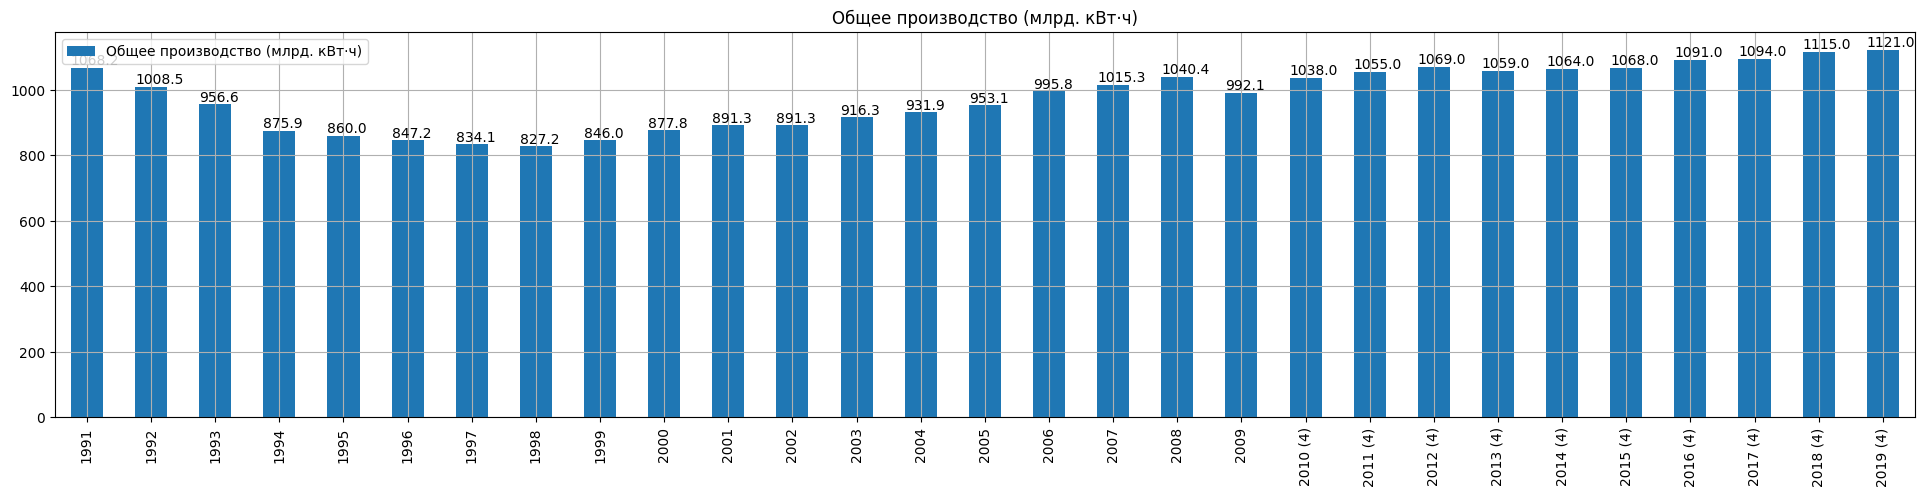

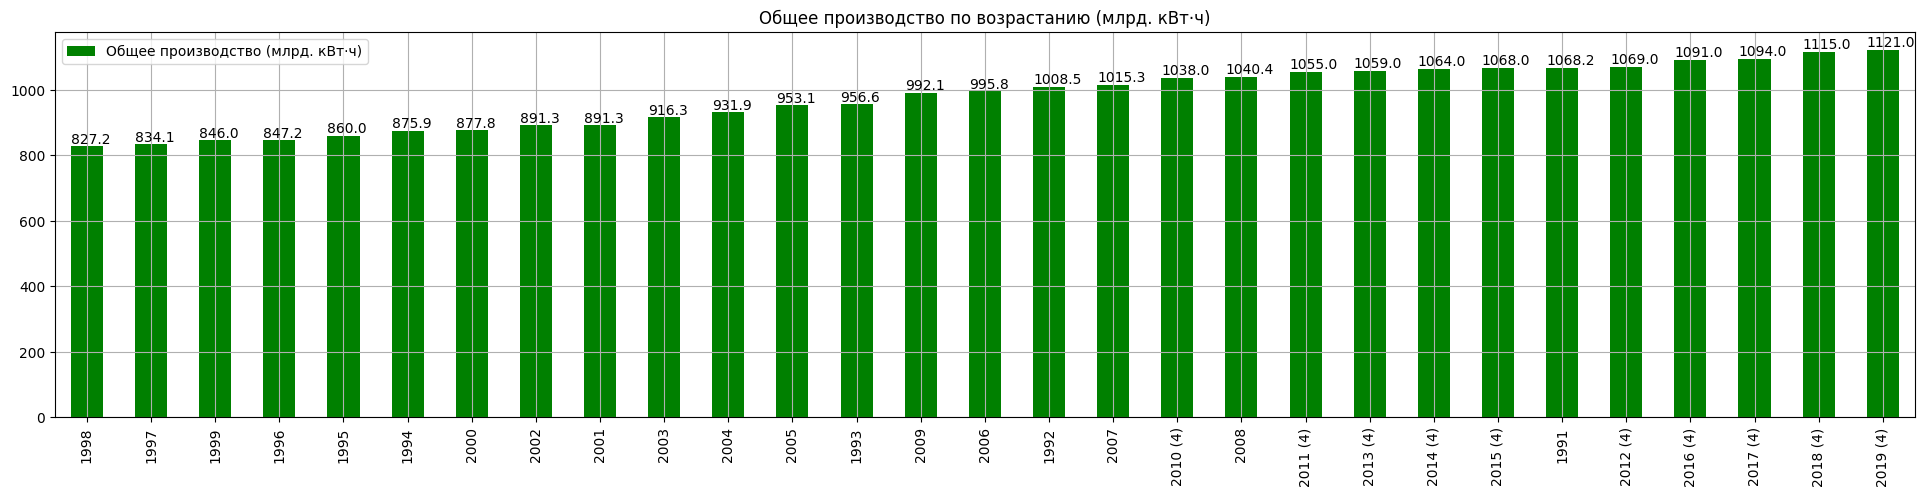

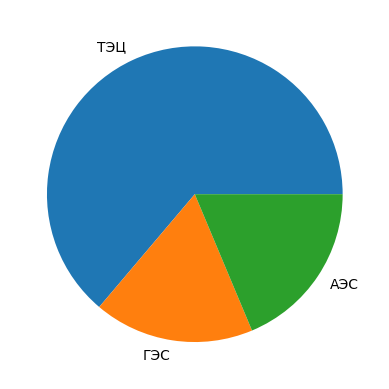

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Web-scrapping 
url = 'https://ru.wikipedia.org/wiki/%D0%AD%D0%BD%D0%B5%D1%80%D0%B3%D0%B5%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
tables = pd.read_html(url)
df_power = tables[5]
df_power = df_power.drop([1, 2, 3, 4], axis=1) 
df_power = df_power.drop([0,1]) 

#Создадим копию данных
df_power_2 = df_power.copy()
 
# Переименуем столбцы и строки
df_power_2.columns = ['Год', 'Общее производство (млрд. кВт·ч)', 'Производство ТЭЦ (млрд. кВт·ч)', 'Производство ГЭС (млрд. кВт·ч)', 'Производство АЭС (млрд. кВт·ч)']
df_power_2 = df_power_2.set_index('Год', drop=False).rename_axis(None)

# Явно укажем, что данные - целые числа
df_power_2['Общее производство (млрд. кВт·ч)'] = df_power_2['Общее производство (млрд. кВт·ч)'].astype('float')
df_power_2['Производство ТЭЦ (млрд. кВт·ч)'] = df_power_2['Производство ТЭЦ (млрд. кВт·ч)'].astype('float')
df_power_2['Производство ГЭС (млрд. кВт·ч)'] = df_power_2['Производство ГЭС (млрд. кВт·ч)'].astype('float')
df_power_2['Производство АЭС (млрд. кВт·ч)'] = df_power_2['Производство АЭС (млрд. кВт·ч)'].astype('float')

# Отредактируем данные
df_power_2.iloc[: -10, 1] = df_power_2.iloc[: -10, 1] / 10
df_power_2.iloc[[1,2,3,4], 4] = df_power_2.iloc[[1,2,3,4], 4] / 10 

# Определим и добавим в таблицу долю выработки энергии ТЭС, ГЭС, АЭС
df_power_2['Доля ТЭЦ (%)'] = round((df_power_2['Производство ТЭЦ (млрд. кВт·ч)'] / df_power_2['Общее производство (млрд. кВт·ч)']) * 100, 2)
df_power_2['Доля ГЭС (%)'] = round((df_power_2['Производство ГЭС (млрд. кВт·ч)'] / df_power_2['Общее производство (млрд. кВт·ч)']) * 100, 2)
df_power_2['Доля АЭС (%)'] = round((df_power_2['Производство АЭС (млрд. кВт·ч)'] / df_power_2['Общее производство (млрд. кВт·ч)']) * 100, 2)

# Вывод значений из таблицы в строке 2008
print('Все данные из строки 2008\n', df_power_2.loc[['2008']],'\n\n')

# Вывод значений из таблицы при условии общей выработки >1000
print('Все данные при условии общей выработки >1000\n', df_power_2[df_power_2['Общее производство (млрд. кВт·ч)'] > 1000.],'\n\n')

# Построим гистограмму производства электроэнергии
axes = df_power_2.iloc[ : , [1]].plot(kind = 'bar', figsize=(24, 5), title='Общее производство (млрд. кВт·ч)')
for p in axes.patches:
  axes.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
axes.grid(True)

# Построим гистограмму производства электроэнергии, отсортированную по возрастанию
df_power_2_sort = df_power_2.sort_values(['Общее производство (млрд. кВт·ч)'], ascending = True)
axes2 = df_power_2_sort.iloc[ : , [1]].plot(kind = 'bar', figsize=(24, 5), color = 'green', title='Общее производство по возрастанию (млрд. кВт·ч)')
for p in axes2.patches:
  axes2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
axes2.grid(True)

# Выведем круговую диаграмму выработки ТЭЦ, ГЭС и АЭС за 2019 год
fig, ax = plt.subplots()
ax.pie(df_power_2.iloc[28, [5,6,7]], labels=["ТЭЦ", "ГЭС", "АЭС"])

# Построим интерактивный график долей выработки ТЭС, ГЭС и АЭС с 1991 по 2019
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import numpy as np

output_notebook()

p = figure(plot_width = 800, plot_height = 400, title='Гистограмма доли видов выработки электроэнергии с 1991 по 2019(%)')
colors = ['black', 'cyan', 'red']
i = 0
for production in ['Доля ТЭЦ (%)', 'Доля ГЭС (%)', 'Доля АЭС (%)']:
  values = df_power_2[production].values 
  p.line(np.arange(1, 30), values, color = colors[i], legend_label = str(production), line_width = 3)
  p.circle(np.arange(1, 30), values, color = colors[i], alpha=0.5, size = 8)
  i+=1
show(p)